<b>LINK database<b>: https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Dicionário

longitude: Uma medida de quão a oeste uma casa está; um valor mais alto indica que está mais a oeste.


latitude: Uma medida de quão ao norte uma casa está; um valor mais alto indica que está mais ao norte.


housingMedianAge: Idade média das casas dentro de um bloco; um número mais baixo indica um prédio mais novo.


totalRooms: Número total de quartos dentro de um bloco.


totalBedrooms: Número total de quartos de dormir dentro de um bloco.


population: Número total de pessoas residindo dentro de um bloco.


households: Número total de domicílios, um grupo de pessoas residindo em uma unidade de habitação, para um bloco.


medianIncome: Renda média para domicílios dentro de um bloco de casas (medido em dezenas de milhares de dólares americanos).


medianHouseValue: Valor médio de uma casa para os domicílios dentro de um bloco (medido em dólares americanos).


oceanProximity: Localização da casa em relação ao oceano/mar.

### 0. Configurações iniciais

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split

In [306]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. EDA

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [308]:
# Dropando os valores nulos 
data.dropna(inplace=True)

In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [310]:
data = data.join(pd.get_dummies(data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [311]:
# x base sem o target
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [313]:
train_data = X_train.join(y_train)

In [314]:
train_data_numerical = train_data.select_dtypes(include=['number'])


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

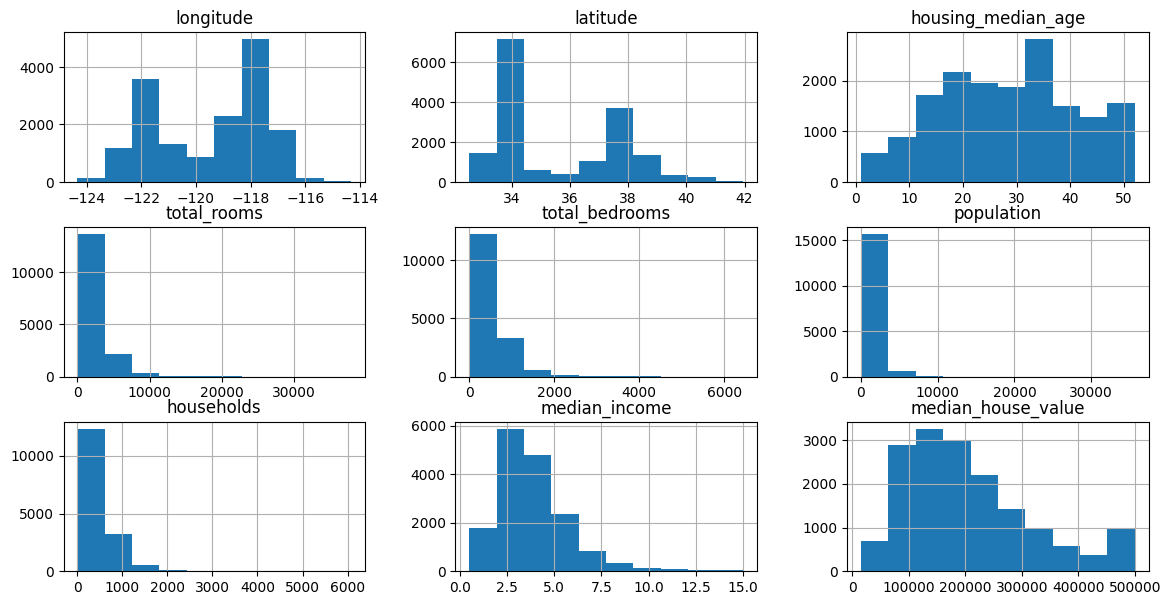

In [315]:
train_data.hist(figsize=(14, 7))

<Axes: >

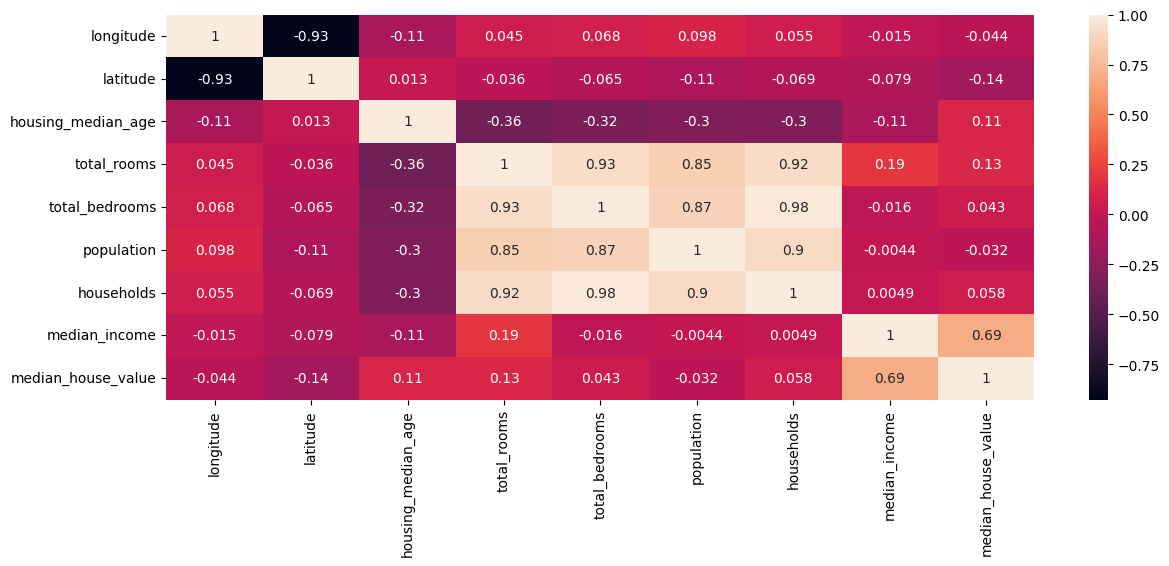

In [316]:
plt.figure(figsize=(14,5))
sns.heatmap(train_data_numerical.corr(), annot=True)

### 2. Preprocessing

In [317]:
# Resolvendo o problema de proporção
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

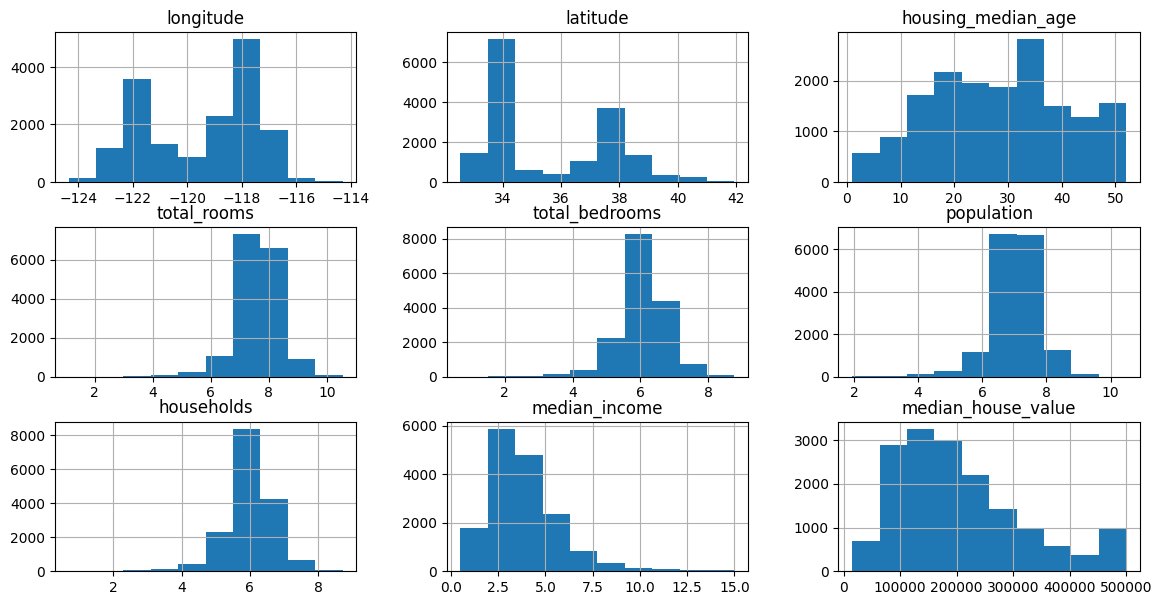

In [318]:
train_data.hist(figsize=(14, 7))

<Axes: >

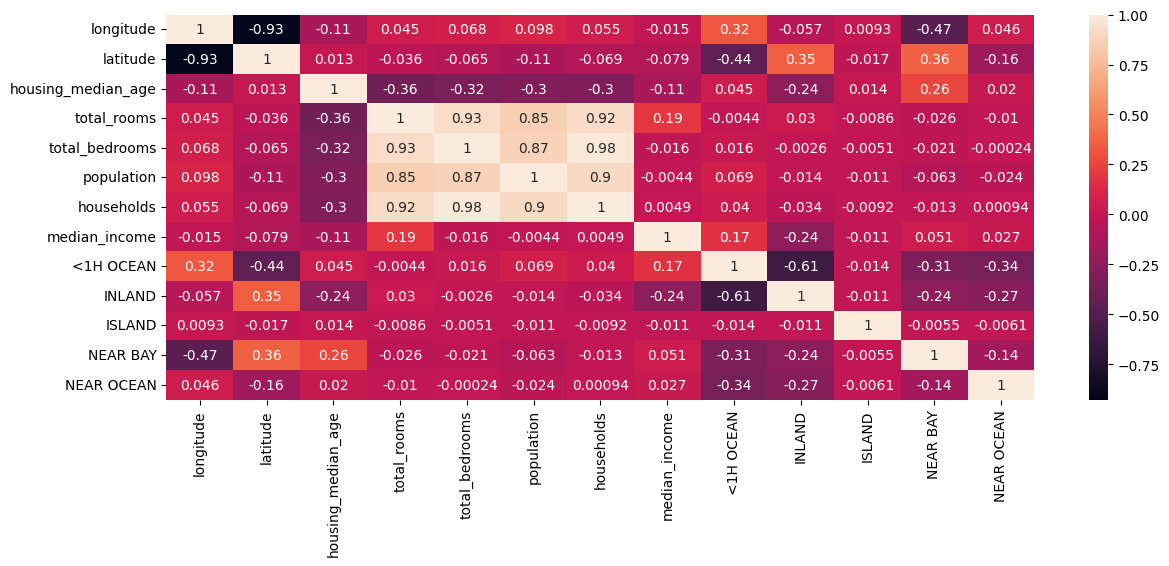

In [319]:
plt.figure(figsize=(14,5))
sns.heatmap(X_train.corr(), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

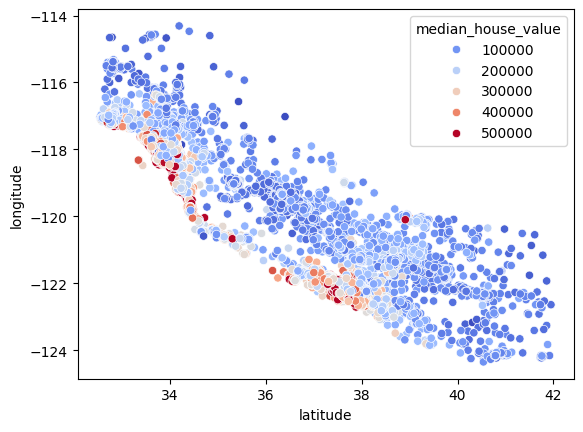

In [320]:

sns.scatterplot(x = 'latitude', 
                y = 'longitude', 
                data=train_data, 
                hue='median_house_value',
                palette='coolwarm')

#### 3. Model

In [321]:
from sklearn.ensemble import RandomForestRegressor

In [322]:
forest = RandomForestRegressor()

In [323]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [327]:
forest.score(X_test, y_test)

0.8306710578140339